In [26]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras import layers
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras import Sequential
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import PredictionErrorDisplay

def load_data(fileName):
    df = pd.read_csv( fileName )
    return df

def print_data(df):
    print( df.head() )
    print( df.info() )
    print( df.describe() )

def prepare_data(df):
    # Drop the Id column
    df = df.drop('id', axis=1)
    X_features = df.drop('FloodProbability', axis=1)
    Y_output = df['FloodProbability']
    return X_features, Y_output

def build_model( splited_data, numEpochs ):
    # X_features, Y_output = prepare_data(df)
    X_train, X_test, Y_train, Y_test = splited_data
    # Split the data into training and testing sets
    # X_train, X_test, Y_train, Y_test = train_test_split(X_features, Y_output,
    #                                         test_size=0.2, random_state=42)
    _, n_features = X_train.shape

    model = keras.Sequential()
    model.add(keras.Input(shape=(n_features,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='linear'))

    # Compile the model
    model.compile(optimizer='adam',
                  loss='mean_squared_logarithmic_error',
                  metrics=['mae'])
    history = model.fit(X_train, Y_train,  validation_split=0.2,
                        epochs=numEpochs )
    print("Finished")
    return model, history

def plot_history(history):
    #plot the training and validation accuracy and loss at each epoch
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.plot(epochs, loss, 'y', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    acc = history.history['mae']
    val_acc = history.history['mae']
    plt.plot(epochs, acc, 'y', label='Training MAE')
    plt.plot(epochs, val_acc, 'r', label='Validation MAE')
    plt.title('Training and validation MAE')
    plt.xlabel('Epochs')
    plt.ylabel('mae')
    plt.legend()
    plt.show()

def run_model( model ):
    predictions = model.predict(X_test)
    return predictions

def evaluate_metrics( predictions, Y_test ):
    MAE = metrics.mean_absolute_error(Y_test, predictions)
    print("Mean absolute error = {}".format(MAE))

    MSE = metrics.mean_squared_error(Y_test, predictions)
    print("Mean squared error = {}".format(MSE))

    RMSE = np.sqrt(metrics.mean_squared_error(Y_test, predictions))
    print("Root mean squared error = {}".format(RMSE))

    R2_Score = metrics.r2_score(Y_test, predictions)
    print("R2 score = {}".format(R2_Score))

def plot_graps( predictions, Y_test ):
    plt.scatter(Y_test, predictions, marker='o', alpha=0.5)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs. Predicted Values')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.axvline(x=0, color='b', linestyle='--')
    # p1 = max(max(predictions), max(Y_test))
    # p2 = min(min(predictions), min(Y_test))
    # plt.plot([p1, p2], [p1, p2], 'b-')
    plt.show()

def plot_sk_graph( predictions, Y_test ):
    fig, axs = plt.subplots(ncols=1, figsize=(8, 4))
    PredictionErrorDisplay.from_predictions(
    Y_test,
    y_pred=predictions,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs,
    random_state=0,
)

In [ ]:
print(f"TensorFlow version: {tf.__version__}")
print(f"GPU is{'not' if len(tf.config.list_physical_devices('GPU')) == 0 else ''} available")
df = load_data('train.csv')
X_features, Y_output = prepare_data(df)
_, n_features = X_features.shape
X_train, X_test, Y_train, Y_test = train_test_split(X_features, Y_output, test_size=0.2, random_state=42)
model , history = build_model( [X_train, X_test, Y_train, Y_test], 100 )

In [ ]:
history.history.items()
plot_history(history)


6988/6988 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
Mean absolute error = 0.015583975525066601
Mean squared error = 0.00042515829267213807
Root mean squared error = 0.020619366931895318
R2 score = 0.8364320202799108


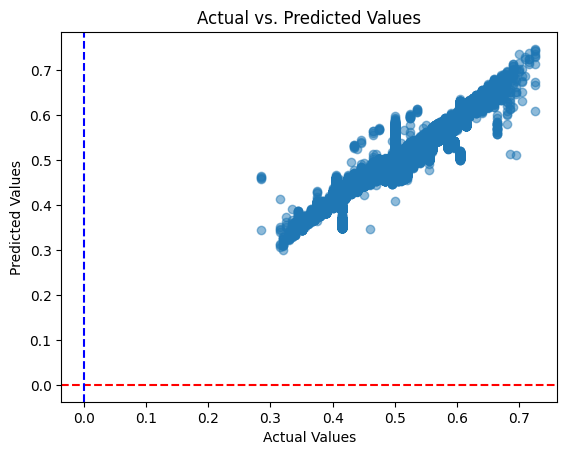

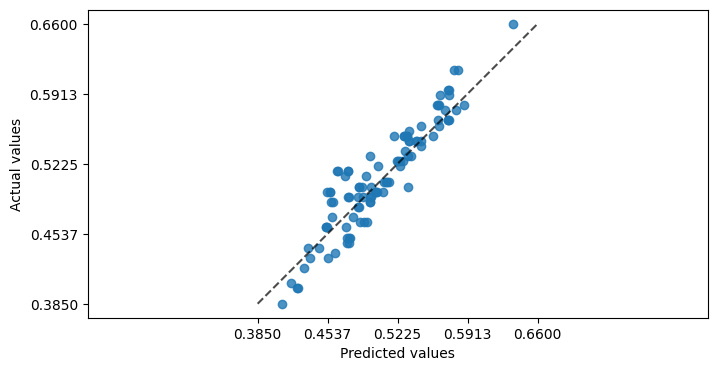

In [27]:
Y_output = run_model(model)
evaluate_metrics(Y_output, Y_test)
plot_graps(Y_output, Y_test)
plot_sk_graph(Y_output, Y_test)
